In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 32s 2us/step


In [11]:
def decode_review(index):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[index]])
    return decode_review

In [12]:
decode_review(2)

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

In [13]:
import numpy as np
# vamos a vectorizar los datos con one-hot encoder para que me quede un vector
# de 0 y 1 dependiendo si está o no X palabra
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [23]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.5257 - acc: 0.7788 - val_loss: 0.3985 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.3187 - acc: 0.8997 - val_loss: 0.3108 - val_acc: 0.8874
Epoch 3/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.2305 - acc: 0.9246 - val_loss: 0.3031 - val_acc: 0.8755
Epoch 4/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.1823 - acc: 0.9409 - val_loss: 0.2785 - val_acc: 0.8864
Epoch 5/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1485 - acc: 0.9537 - val_loss: 0.2812 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.1204 - acc: 0.9638 - val_loss: 0.3067 - val_acc: 0.8810
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1006 - acc: 0.9709 - val_loss: 0.3024 - val_acc

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

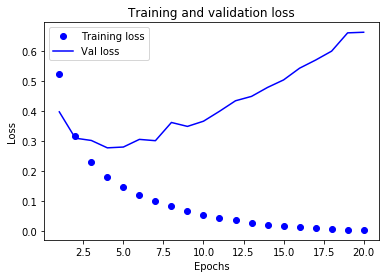

In [28]:
# Ploteo de training y validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Val loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


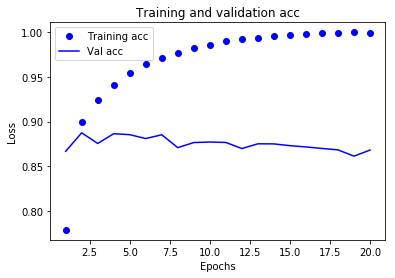

In [30]:
# ploteo de acc
# Ploteo de training y validation loss
import matplotlib.pyplot as plt
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Val acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
# Hago el reentrenamiento desde 0 pero solo con 4 epochs porque ahí tiene el pico
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.4767 - acc: 0.8194
Epoch 2/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.2689 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2016 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 1s 37us/step


In [33]:
 model.predict(x_test)

array([[0.13671312],
       [0.99974424],
       [0.5035702 ],
       ...,
       [0.08974391],
       [0.04412793],
       [0.45764065]], dtype=float32)